### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


**Question 1 :** Implement a scraping script for getting 10 days weather forecasts 

# Benguerir City


In [41]:
#We installed package 
#Now let's import them
from bs4 import BeautifulSoup
import requests

#Benguerir data
html_BenGuerir = requests.get('https://weather.com/weather/tenday/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111').text
soupB = BeautifulSoup(html_BenGuerir,'lxml')
#Getting all the information
#since the id is unique we can use it to get all the information contained on that div
weatherB = soupB.find('div',id='WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263')
#Now let's only take the days
days = weatherB.find_all('h3')
Day = []#all days on the page
Days10 = []#The ten days we need
for day in days:
    d = day.find('span')
    if  d != None:
     if d.get_text() not in Day:
              Day.append(d.get_text())
Days10=Day[0:10] #In Days10 we only have the 10 days in question
#Let's try to take the rest of the informaion about the weather
#it is contained in the summary
sum = weatherB.find_all('summary')
#Let's define a function to get info about the weather in a day
def get_info(sum):
    data = []
    for divs in sum.find('div').find_all('div'):
        spans = divs.find_all('span')
        for span in spans:
            data.append(span.get_text())

        break
        
    return data



# Tanger City

In [40]:
#Now let's do it for Tanger city
#Tanger data
html_Tanger = requests.get('https://weather.com/weather/tenday/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c').text
soupB = BeautifulSoup(html_Tanger,'lxml')
#Getting all the information

#since the id is unique we can use it to get all the information contained on that div
weatherT = soupB.find('div',id='WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263')
#Now let's only take the days
Tdays = weatherT.find_all('h3')#T to refer to Tanger
TDay = []#all days on the page
TDays10 = []#The ten days we need
for day in Tdays:
    d = day.find('span')
    if  d != None:
     if d.get_text() not in TDay:
              TDay.append(d.get_text())
TDays10=TDay[0:10] #In Days10 we only have the 10 days in question
#Let's try to take the rest of the informaion about the weather
#it is contained in the summary
Tsum = weatherB.find_all('summary')
#Let's define a function to get info about the weather in a day
def get_info(Tsum):
    data = []
    for divs in Tsum.find('div').find_all('div'):
        spans = divs.find_all('span')
        for span in spans:
            data.append(span.get_text())

        break
        
    return data




**Question 2 :** Store the data sets into Pandas DataFrame.

# Benguerir City

In [33]:
#Question 2

#Let store the data sets into Pandas DataFrame.
import pandas as pd
#Data of Benguerir City
#since we defined the funcTion we can use it now
Bdata = [get_info(sum[day]) for day in range(10)]
dfBenguerir = pd.DataFrame(data=Bdata)
dfBenguerir.drop(1, axis=1, inplace=True)
dfBenguerir = pd.concat([pd.DataFrame(data=Days10), dfBenguerir], axis=1)
columns = ['Day', 'Max_Temp', 'Min_Temp', 'State', 
           'Value_%', 'Wind_speed']
dfBenguerir.columns = columns

dfBenguerir



,Day,Max_Temp,Min_Temp,State,Value_%,Wind_speed
0,Mon 19,--,47°,Partly Cloudy,10%,ENE 5 mph
1,Tue 20,73°,45°,Partly Cloudy,8%,SE 7 mph
2,Wed 21,71°,44°,Sunny,8%,ENE 8 mph
3,Thu 22,71°,45°,Mostly Sunny,10%,ENE 8 mph
4,Fri 23,74°,45°,Sunny,10%,SSE 6 mph
5,Sat 24,75°,44°,Sunny,7%,SSW 9 mph
6,Sun 25,73°,43°,Mostly Sunny,3%,E 7 mph
7,Mon 26,73°,44°,Sunny,0%,SE 8 mph
8,Tue 27,71°,46°,Mostly Sunny,0%,SSE 10 mph
9,Wed 28,70°,45°,Partly Cloudy,1%,S 11 mph


# Tanger City

In [42]:
#Data of Tangier city
data = [get_info(Tsum[day]) for day in range(10)]
dfTanger = pd.DataFrame(data=data)
dfTanger.drop(1, axis=1, inplace=True)
dfTanger = pd.concat([pd.DataFrame(data=TDays10), dfTanger], axis=1)
Tcolumns = ['Day', 'Max_Temp', 'Min_Temp', 'State', 
           'Value_%', 'Wind_speed']
dfTanger.columns = Tcolumns

dfTanger

,Day,Max_Temp,Min_Temp,State,Value_%,Wind_speed
0,Mon 19,--,54°,Partly Cloudy,14%,E 8 mph
1,Tue 20,71°,60°,Partly Cloudy,12%,SSE 9 mph
2,Wed 21,67°,56°,AM Showers,52%,SW 7 mph
3,Thu 22,66°,55°,Partly Cloudy,14%,NNW 4 mph
4,Fri 23,67°,56°,Mostly Sunny,12%,WSW 5 mph
5,Sat 24,68°,55°,Partly Cloudy,12%,WSW 6 mph
6,Sun 25,70°,57°,Partly Cloudy,10%,ESE 6 mph
7,Mon 26,69°,56°,Mostly Sunny,8%,E 10 mph
8,Tue 27,68°,55°,Partly Cloudy,24%,E 9 mph
9,Wed 28,66°,58°,Partly Cloudy,23%,ESE 11 mph


**Question 3 :** Use matplotlib library to plot the raining days of the two cities in the same figure.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
dfBenguerir["State"].value_counts()
dfTanger["State"].value_counts()

Partly Cloudy    7
Mostly Sunny     2
AM Showers       1
Name: State, dtype: int64

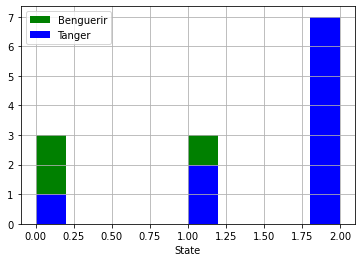

In [39]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
dfBenguerir["state_to_code"] = ord_enc.fit_transform(dfBenguerir[["State"]])
dfTanger["state_to_code"] = ord_enc.fit_transform(dfTanger[["State"]])
plt.hist(dfBenguerir['state_to_code'],color='g', label='Benguerir')
plt.hist(dfTanger['state_to_code'],color='b', label='Tanger')
plt.xlabel("State")
plt.legend()
plt.grid()
plt.show() 